## Занятие №7

In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime

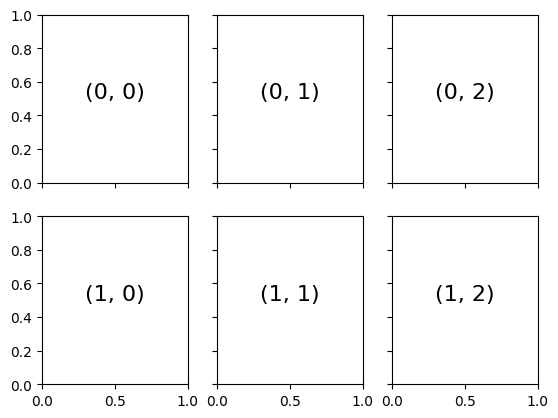

In [2]:
fig, ax = plt.subplots(2,3,
                       sharex='col',
                       sharey='row') # Убирает дублирование значение осей по x и y

for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str((i,j)),fontsize=16,
                     ha='center')
plt.show()

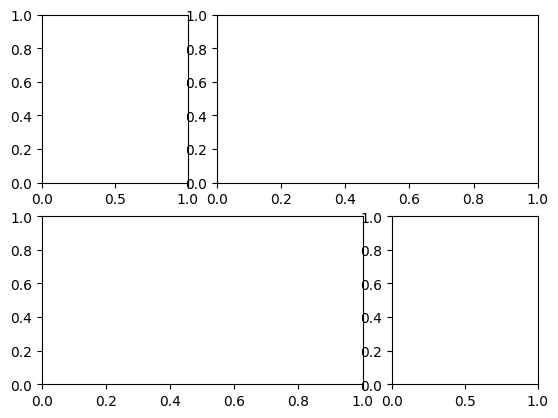

In [3]:
grid = plt.GridSpec(2, 3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

plt.show()

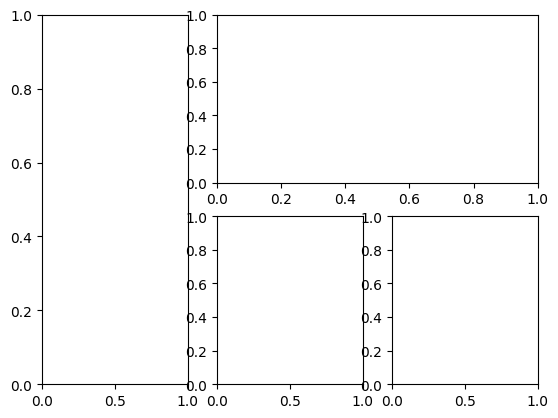

In [4]:
grid = plt.GridSpec(2, 3)
plt.subplot(grid[:2,0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, 1])
plt.subplot(grid[1, 2])

plt.show()

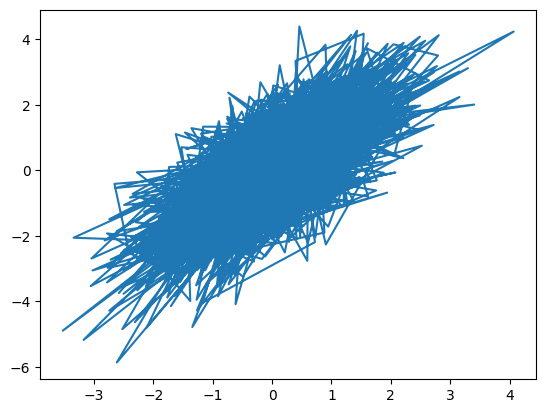

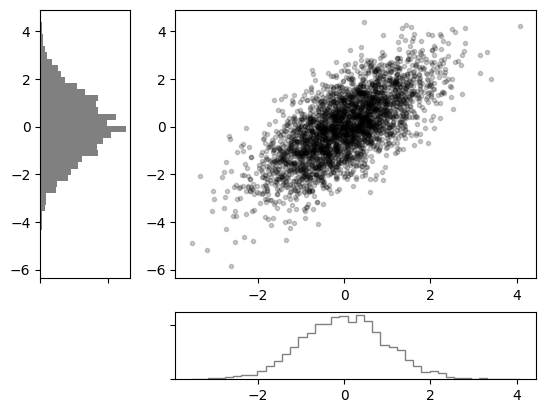

In [5]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
rng = np.random.default_rng(1)
x, y = rng.multivariate_normal(mean, cov, 3000).T
plt.plot(x, y)

fig = plt.figure()
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.5)

main_ax = fig.add_subplot(grid[:-1, 1:])

y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, "ok", markersize=3, alpha=0.2)

y_hist.hist(y, 40, orientation="horizontal", color="gray", histtype="stepfilled")
x_hist.hist(x, 40, orientation="vertical", color="gray", histtype="step")

plt.show()

### Поясняющие надписи

            births
1969-01-01  4243.0
1969-01-02  4501.0
1969-01-03  4771.0
1969-01-04  4480.0
1969-01-05  4195.0


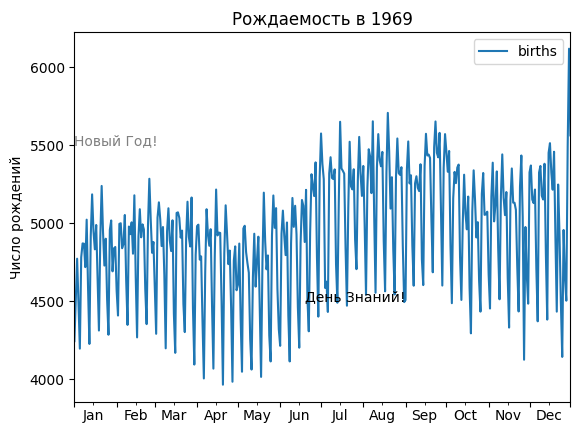

In [43]:
births = pd.read_csv("./data/births-1969.csv")

births["day"] = births["day"].astype(int)  # Преобразует дни в тип int
births.index = pd.to_datetime(
    10000 * births.year + 100 * births.month + births.day, format="%Y%m%d"
)
# print(births.head())

births_by_date = births.pivot_table("births", [births.index.month, births.index.day])
# print(births_by_date.head())
from datetime import datetime

births_by_date.index = [
    datetime(1969, month, day) for (month, day) in births_by_date.index
]
print(births_by_date.head())

fig, ax = plt.subplots()
births_by_date.plot(ax=ax)

style = dict(size=10, color="gray")
ax.text("1969-01-01", 5500, "Новый Год!", **style)
ax.text("1969-09-01", 4500, "День Знаний!", ha="right")

ax.set(title="Рождаемость в 1969", ylabel="Число рождений")

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))


plt.show()

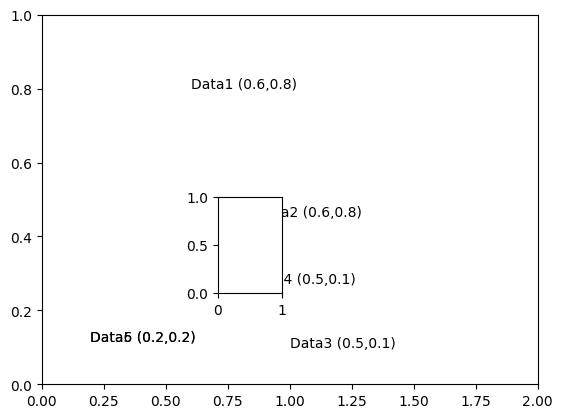

In [55]:
fig = plt.figure()
ax1 = plt.axes()
ax2 = plt.axes([0.4, 0.3, 0.1, 0.2])  # позицирование по x, y, размеры в долях по x, y

ax1.set_xlim(0, 2)

ax1.text(0.6, 0.8, "Data1 (0.6,0.8)", transform=ax1.transData)  # Относительно данных
ax1.text(0.6, 0.8, "Data2 (0.6,0.8)", transform=ax2.transData)  # Относительно данных

ax1.text(0.5, 0.1, "Data3 (0.5,0.1)", transform=ax1.transAxes)  # Относительно осей
ax1.text(0.5, 0.1, "Data4 (0.5,0.1)", transform=ax2.transAxes)  # Относительно осей

ax1.text(0.2, 0.2, "Data5 (0.2,0.2)", transform=fig.transFigure)  # Относительно фигуры
ax1.text(0.2, 0.2, "Data6 (0.2,0.2)", transform=fig.transFigure)  # Относительно фигуры


plt.show()

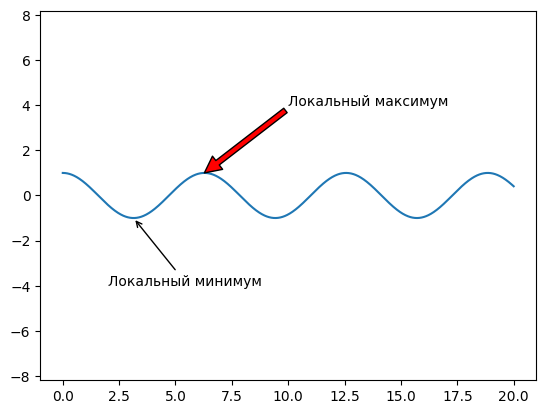

In [65]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate(
    "Локальный максимум", xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor="red")
)
ax.annotate(
    "Локальный минимум", xy=(3.14, -1), xytext=(2, -4), arrowprops=dict(facecolor="blue",arrowstyle='->')
)

plt.show()

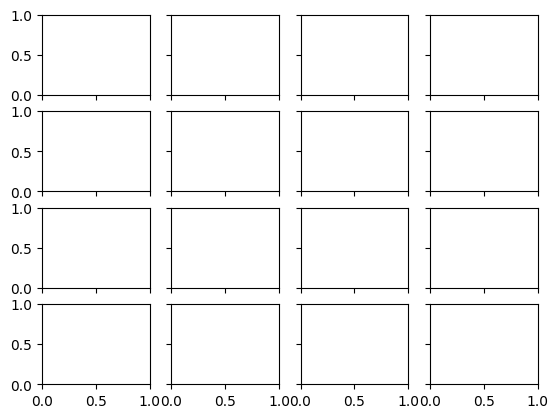

In [66]:
fig,ax=plt.subplots(4,4,sharex=True,sharey=True)
for ax in ax.flat:
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))


plt.show()

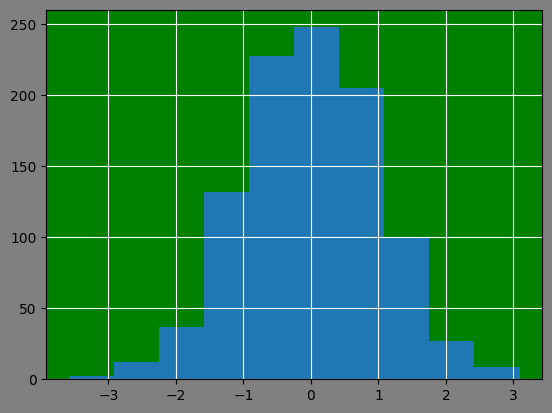

In [78]:
x=np.random.randn(1000)
fig=plt.figure(facecolor='gray')
ax=plt.axes(facecolor='green')
plt.grid(color='w',linestyle='solid')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
plt.hist(x)

plt.show()